In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the Data

data = np.loadtxt('./data/3_Characterising/Characterising1D/dataset.txt')

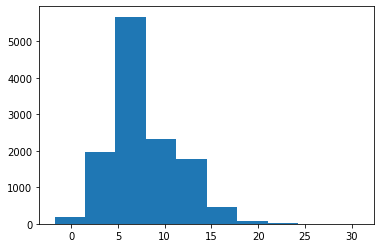

In [3]:
# Plot the Histogram

plt.hist(data);

In [4]:
# Centrality

# Create a Mean Function - Mean defines Centrality. Mean is Sensitive to Outliers

def get_mean(xs):
    summed = 0
    for i in xs:
        summed+= i
    return summed/len(xs)

In [5]:
get_mean([1,2,3,4,5])

3.0

In [6]:
# We can get Already invoked Function for mean for dataset
mean = np.mean(data)

# We can Also get the means using different approaches such as 

print(mean, data.mean(), np.average(data))
# With average, you can do a Weighted average

7.68805056 7.68805056 7.68805056


In [7]:
# Median - Getting the Mid point of the Data. Median are Not Sensitive to Outliers

# Define a function 

def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1 : mid + 1])

In [8]:
get_median([7,7,3,1,4,5])

4.5

In [9]:
# We can get Already invoked Function for mean for dataset. 
median = np.median(data)
print(median)

6.7325


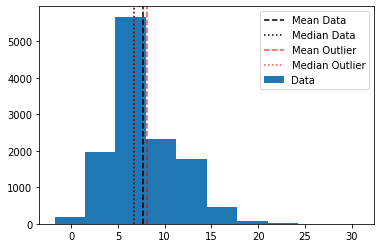

In [10]:
# Visual for Mean vs Median Outlier Detection

outlier = np.insert(data, 0, 5000)

# Plotting the Values

plt.hist(data, label= "Data");
plt.axvline(np.mean(data), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(data), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(outlier), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(outlier), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

# We can see with Plot that Mean is Sensitive to Outliers, but Medians are not prone(No big change)

In [11]:
# Mode - It is also Outlier Insensitive. Returns Most common value

# Create a Mode Function

def get_mode(xs):
    values, counts = np.unique(xs, return_counts= True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]

In [12]:
# Check the Function

get_mode([1,7,2,5,3,7,3,3,2,7,7])

7

In [13]:
# Get the mode using Scipy

mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


In [14]:
# Do Bins and check as 3 decimal places constitutes to a difference, if value is 4 decimal places

hist, edges = np.histogram(data, bins= 100)
edge_center = 0.5 * (edges[1: ] + edges[: -1])
mode = edge_center[hist.argmax()]
print(mode)

5.223165


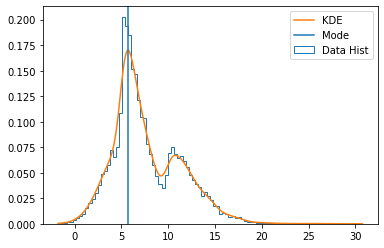

In [15]:
# What you do above is Smooth your Datausing bandwith or KDE, and get max with smoothing

# You can do it by

kde = st.gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), num= 1000)
y_vals = kde(x_vals)

mode = x_vals[y_vals.argmax()]

# Plotting the Data

plt.hist(data, bins= 100, density= True, label= "Data Hist", histtype= "step")
plt.plot(x_vals,y_vals, label= "KDE")
plt.axvline(mode, label= "Mode")
plt.legend();

# For a Discrete Distribution, Getting the Mode is Simple, but for Continuous, you use the above method
# For Probablity Distribution, the Point of Maximum Likelyhood/ Point of Maximum Probablity is the Mode

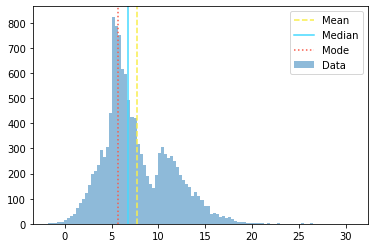

In [16]:
# Plot Mean, Median, Mode in the given data

plt.hist(data, bins= 100, density= False, label= "Data", alpha= 0.5)
plt.axvline(mean, label= "Mean", ls= "--", c= "#f9ee4a")
plt.axvline(median, label= "Median", ls= "-", c= "#44d9ff")
plt.axvline(mode, label= "Mode", ls= ":", c= "#f95b4a")
plt.legend();

***
## Measures of Width and Balance

In [17]:
# Variance - Measure of How the Distribution of Data is spread around Mean

def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for i in xs:
        summed += (i - mean) ** 2
    return summed / (len(xs) - 1) # For Sample - (x - mean)/n-1

In [18]:
get_variance([1,2,3,4,5])

2.5

In [19]:
# Predefined Function

variance = np.var([1,2,3,4,5], ddof=1) # Delta Degree of Freedom sets it as Population or Sample
print(variance)

2.5


In [20]:
# Predefined Function

variance = np.var(data, ddof=1) # Delta Degree of Freedom sets it as Population or Sample
print(variance)

13.137626632694301


In [21]:
# Standard Deviation - Square root of Variance

std = np.std(data)
print(std, std**2)

3.6244414221454435 13.136575622563685


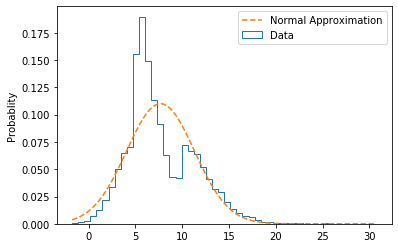

In [22]:
# Both Powers Combined

xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc= mean, scale = std)

# Plot
plt.hist(data, bins= 50, density= True, histtype= "step", label= "Data")
plt.plot(xs, ys, ls= "--", label= "Normal Approximation")
plt.ylabel("Probablity")
plt.legend();

In [23]:
# Skewness - Measure of Asymmetry

def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean) ** 3
    return (summed/(len(xs))) / (var ** 1.5)

In [24]:
# This is a Symmetric Distribution, so no skewness
get_skewness([1,2,3,4,5])

0.0

In [25]:
# Using Predefined Function

skewness = st.skew(data)

# Try for Ours and Predefined Data

print(get_skewness(data), skewness)

0.7408773663373582 0.7408773663373577


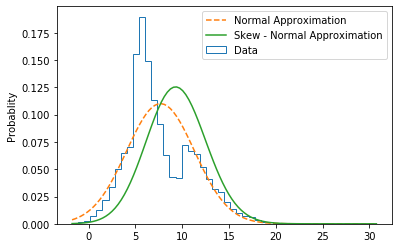

In [26]:
# Both Powers Combined
# Use Gaussian Approximation with Skewness

xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc= mean, scale = std)
ys2 = st.skewnorm.pdf(xs, skewness,loc= mean, scale = std)

# Plot
plt.hist(data, bins= 50, density= True, histtype= "step", label= "Data")
plt.plot(xs, ys1, ls= "--", label= "Normal Approximation")
plt.plot(xs, ys2, ls= "-", label= "Skew - Normal Approximation")
plt.ylabel("Probablity")
plt.legend();

# The Mean here is not Adjusted for Skewness

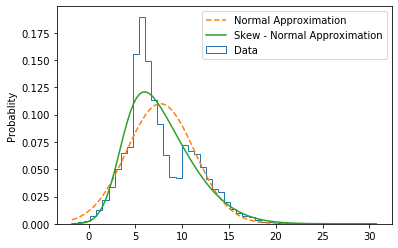

In [27]:
# The Mean for Skew normal Distribution is to be done

xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc= mean, scale = std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps) # New Mean of all skew normal. Gives us a Mean Adjusted for Skewness

# Plot
plt.hist(data, bins= 50, density= True, histtype= "step", label= "Data")
plt.plot(xs, ys1, ls= "--", label= "Normal Approximation")
plt.plot(xs, ys2, ls= "-", label= "Skew - Normal Approximation")
plt.ylabel("Probablity")
plt.legend();

# Skew Normal Distribution fits the Data well than Normal Distribution

In [28]:
# Kurtosis - Similar to Skewness

def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean) ** 4
    return (summed / (len(xs))) / var ** 2

In [29]:
get_kurtosis([1,2,3,4,5])

1.7

In [30]:
# Predefined Kurtosis

kurtosis = st.kurtosis(data)

print(kurtosis, get_kurtosis(data))

# They arent the Same. They Differ by 3. So we need to pass fisher = False. Fisher is a way to Normalize Kurtosis
# If kurtosis is run on Standard Normal Distribution, its kurtosis is 3. So we normalize relative to Normal Distribution

kurtosis = st.kurtosis(data, fisher= False)

print(kurtosis, get_kurtosis(data))

0.5517538497309498 3.551753849730955
3.5517538497309498 3.551753849730955


****
## Percentile

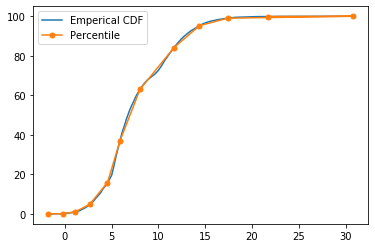

In [31]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 10))
ps = np.insert(ps, 0, 0) # Insert 0 at the Start
ps = np.insert(ps, -1, 100) # Insert 100 at the End
# The Above helps in going to the Start and End of the Data
x_p = np.percentile(data, ps)

# Emperical Distribution

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

# Plot the Values

plt.plot(xs, ys * 100, label = "Emperical CDF")
plt.plot(x_p, ps, label= "Percentile", marker= ".", ms= 10)
plt.legend();
plt.show();

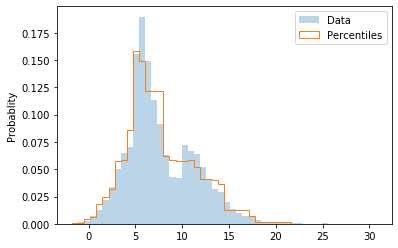

In [32]:
# Try Creating a Histogram

from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size= n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)
_, bins, _ = plt.hist(data, bins=50, density= True, alpha= 0.3, label= "Data")
plt.hist(samp_percentile_1, bins= bins, density= True, histtype= "step", label= "Percentiles")
plt.ylabel("Probablity")
plt.legend();

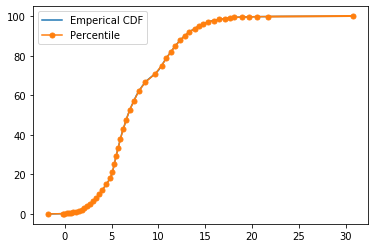

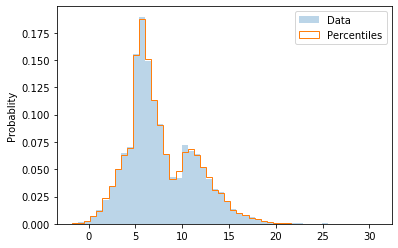

In [33]:
# To Make it Fit Smoother

ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.insert(ps, 0, 0) # Insert 0 at the Start
ps = np.insert(ps, -1, 100) # Insert 100 at the End
# The Above helps in going to the Start and End of the Data
x_p = np.percentile(data, ps)

# Emperical Distribution

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

# Plot the Values

plt.plot(xs, ys * 100, label = "Emperical CDF")
plt.plot(x_p, ps, label= "Percentile", marker= ".", ms= 10)
plt.legend();
plt.show();

# Try Creating a Histogram

from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size= n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)
_, bins, _ = plt.hist(data, bins=50, density= True, alpha= 0.3, label= "Data")
plt.hist(samp_percentile_1, bins= bins, density= True, histtype= "step", label= "Percentiles")
plt.ylabel("Probablity")
plt.legend();

# We Condensed our Data vectors of 1000's datapoint to 52 points, and also perfectly recover this 1D Distribution
# It is good for 1D Distribution, but as D increases, it becomes hard. Percentiles Scale exponentially 